In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns
from plotnine import *
import missingno as msno
import folium

전국 도시 공원 정보 표준 데이터  
공공데이터포털(https://www.data.go.kr/)에서 '전국도시공원표준데이터' 검색

<img src='./images/전국도시공원표준데이터1.png' align="left" width="1100"/>

<img src='./images/전국도시공원표준데이터2.png' align="left" width="1100"/>

<img src='./images/전국도시공원표준데이터3.png' align="left" width="1100"/>

다운받은 데이터를 로드하고 관찰한다.

In [2]:
park_202308 = pd.read_csv('./data/park_202308.csv', encoding='cp949')
park_202308

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,41390-00084,승지공원,근린공원,경기도 시흥시 능곡중앙로 85,경기도 시흥시 능곡동 552,37.371378,126.813132,10842.0,NaN,조합놀이대,NaN,도서관,NaN,2004-11-10,경기도 시흥시청,031-310-3869,2022-11-28,4010000,경기도 시흥시
1,41570-00059,고촌어린이19(수기1공원),어린이공원,NaN,경기도 김포시 고촌읍 신곡리 1249,37.600127,126.767372,1715.0,NaN,조합놀이대+그네,NaN,NaN,NaN,2005-06-07,경기도 김포시 공원관리과,031-980-5627,2022-10-18,4090000,경기도 김포시
2,41570-00060,고촌어린이20(수기2공원),어린이공원,NaN,경기도 김포시 고촌읍 신곡리 1260,37.596805,126.770145,1522.0,체력단련시설,조합놀이대+그네,NaN,NaN,NaN,2005-06-07,경기도 김포시 공원관리과,031-980-5627,2022-10-18,4090000,경기도 김포시
3,41570-00061,고촌어린이21(수기3공원),어린이공원,NaN,경기도 김포시 고촌읍 신곡리 1268,37.596252,126.767048,1567.0,NaN,조합놀이대+그네,NaN,NaN,NaN,2005-06-07,경기도 김포시 공원관리과,031-980-5627,2022-10-18,4090000,경기도 김포시
4,41570-00063,항공소공원1,소공원,NaN,경기도 김포시 대곶면 대벽리 산66-56,37.617583,126.580436,1968.0,NaN,NaN,NaN,NaN,NaN,2007-12-17,경기도 김포시 공원녹지과,031-980-2344,2022-10-18,4090000,경기도 김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,11500-00044,꿈돌이,어린이공원,NaN,서울특별시 강서구 화곡동 24-128,37.546097,126.845352,1507.0,NaN,어린이놀이시설,화장실,NaN,NaN,NaN,서울특별시 강서구청,02-2600-4202,2023-03-10,3150000,서울특별시 강서구
18214,11500-00045,소나무,어린이공원,NaN,서울특별시 강서구 화곡동 29-31,37.547058,126.847807,942.0,NaN,어린이놀이시설,NaN,NaN,NaN,NaN,서울특별시 강서구청,02-2600-4202,2023-03-10,3150000,서울특별시 강서구
18215,11500-00046,산새,어린이공원,NaN,서울특별시 강서구 화곡동 772,37.546268,126.850385,539.0,NaN,어린이놀이시설,음수대,NaN,NaN,NaN,서울특별시 강서구청,02-2600-4202,2023-03-10,3150000,서울특별시 강서구
18216,11500-00047,박장,어린이공원,NaN,서울특별시 강서구 화곡동 56-25,37.540768,126.849087,929.0,NaN,어린이놀이시설,NaN,NaN,NaN,NaN,서울특별시 강서구청,02-2600-4202,2023-03-10,3150000,서울특별시 강서구


In [3]:
# park_202308.dtypes
park_202308.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18218 non-null  object 
 1   공원명           18218 non-null  object 
 2   공원구분          18218 non-null  object 
 3   소재지도로명주소      3659 non-null   object 
 4   소재지지번주소       18055 non-null  object 
 5   위도            18216 non-null  float64
 6   경도            18216 non-null  float64
 7   공원면적          18218 non-null  float64
 8   공원보유시설(운동시설)  5048 non-null   object 
 9   공원보유시설(유희시설)  6442 non-null   object 
 10  공원보유시설(편익시설)  5023 non-null   object 
 11  공원보유시설(교양시설)  749 non-null    object 
 12  공원보유시설(기타시설)  2720 non-null   object 
 13  지정고시일         15229 non-null  object 
 14  관리기관명         16851 non-null  object 
 15  전화번호          17106 non-null  object 
 16  데이터기준일자       18218 non-null  object 
 17  제공기관코드        18218 non-null  object 
 18  제공기관명         18218 non-nu

In [4]:
# park_202308.isnull().sum()
park_202308.isna().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        14559
소재지지번주소           163
위도                  2
경도                  2
공원면적                0
공원보유시설(운동시설)    13170
공원보유시설(유희시설)    11776
공원보유시설(편익시설)    13195
공원보유시설(교양시설)    17469
공원보유시설(기타시설)    15498
지정고시일            2989
관리기관명            1367
전화번호             1112
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

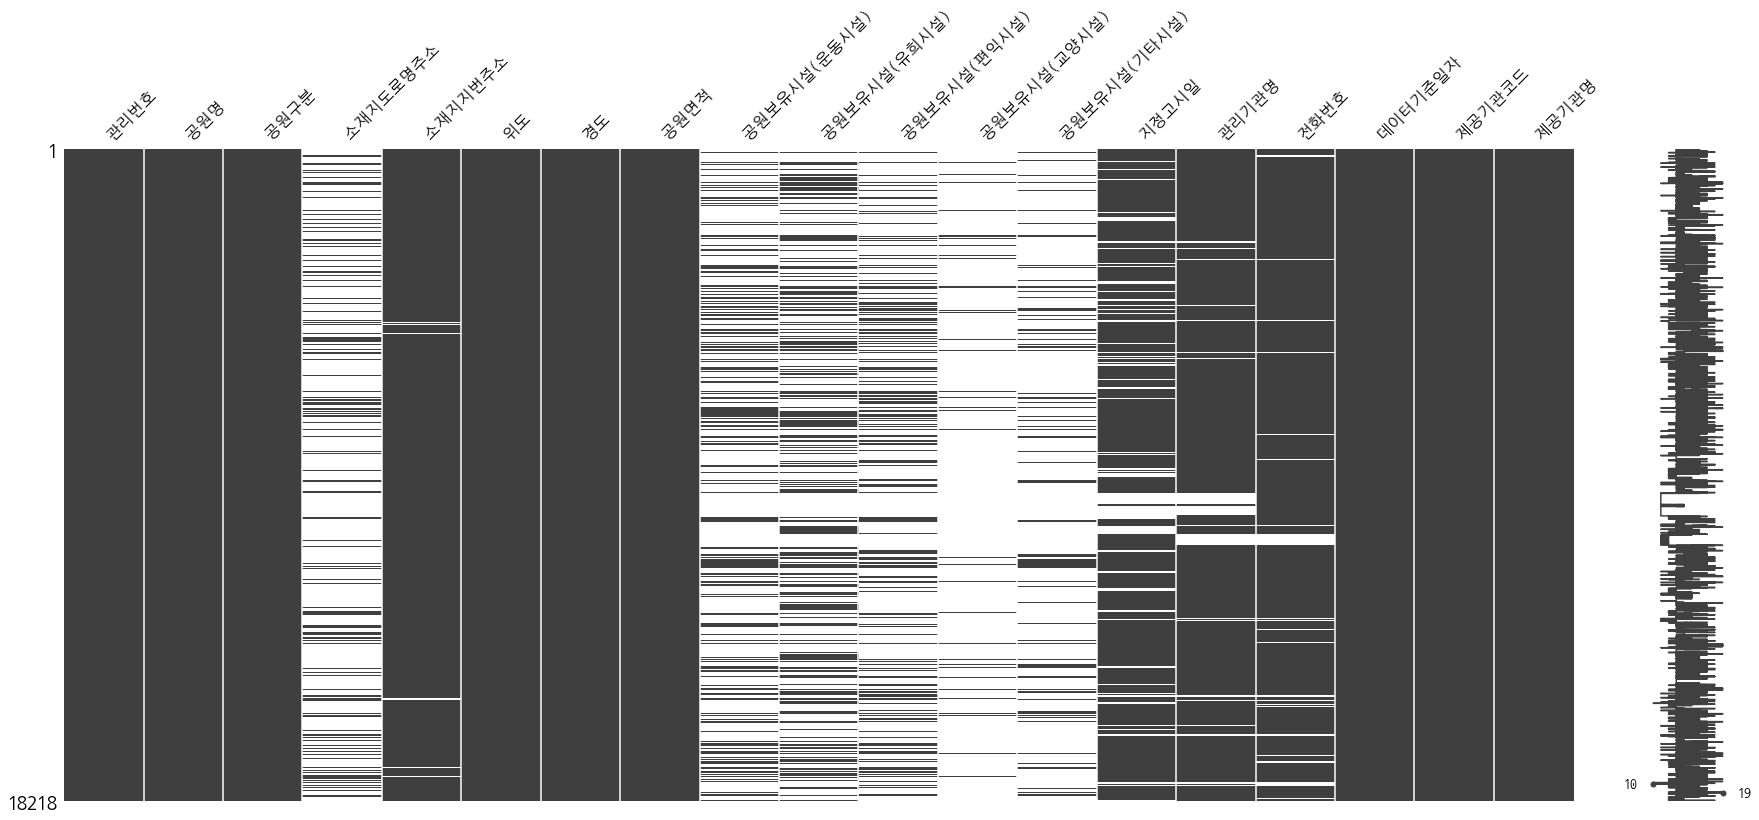

In [5]:
msno.matrix(park_202308, figsize=(30, 12))
plt.show()

In [6]:
park_202308.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [7]:
# drop() 메소드로 불요할 컬럼을 제거한다.
park_202308.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', 
                '공원보유시설(교양시설)', '공원보유시설(기타시설)', '지정고시일', '관리기관명'], inplace=True)
park_202308

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
0,41390-00084,승지공원,근린공원,경기도 시흥시 능곡중앙로 85,경기도 시흥시 능곡동 552,37.371378,126.813132,10842.0,031-310-3869,2022-11-28,4010000,경기도 시흥시
1,41570-00059,고촌어린이19(수기1공원),어린이공원,NaN,경기도 김포시 고촌읍 신곡리 1249,37.600127,126.767372,1715.0,031-980-5627,2022-10-18,4090000,경기도 김포시
2,41570-00060,고촌어린이20(수기2공원),어린이공원,NaN,경기도 김포시 고촌읍 신곡리 1260,37.596805,126.770145,1522.0,031-980-5627,2022-10-18,4090000,경기도 김포시
3,41570-00061,고촌어린이21(수기3공원),어린이공원,NaN,경기도 김포시 고촌읍 신곡리 1268,37.596252,126.767048,1567.0,031-980-5627,2022-10-18,4090000,경기도 김포시
4,41570-00063,항공소공원1,소공원,NaN,경기도 김포시 대곶면 대벽리 산66-56,37.617583,126.580436,1968.0,031-980-2344,2022-10-18,4090000,경기도 김포시
...,...,...,...,...,...,...,...,...,...,...,...,...
18213,11500-00044,꿈돌이,어린이공원,NaN,서울특별시 강서구 화곡동 24-128,37.546097,126.845352,1507.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구
18214,11500-00045,소나무,어린이공원,NaN,서울특별시 강서구 화곡동 29-31,37.547058,126.847807,942.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구
18215,11500-00046,산새,어린이공원,NaN,서울특별시 강서구 화곡동 772,37.546268,126.850385,539.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구
18216,11500-00047,박장,어린이공원,NaN,서울특별시 강서구 화곡동 56-25,37.540768,126.849087,929.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구


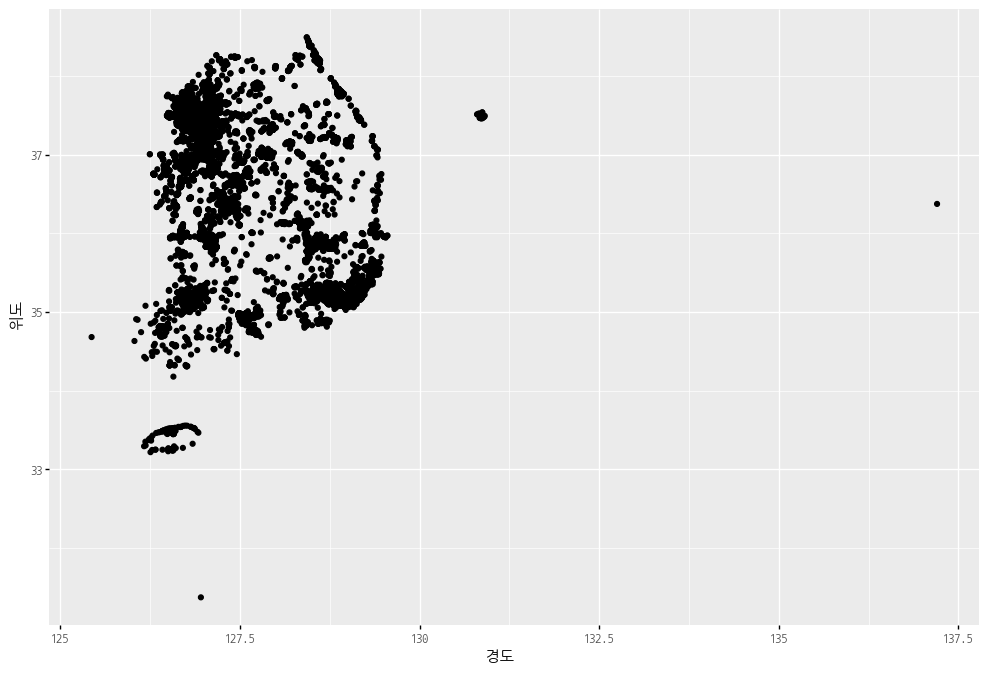

<ggplot: (183880505001)>

In [8]:
(
    ggplot(park_202308, aes(x='경도', y='위도'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(12, 8))
)

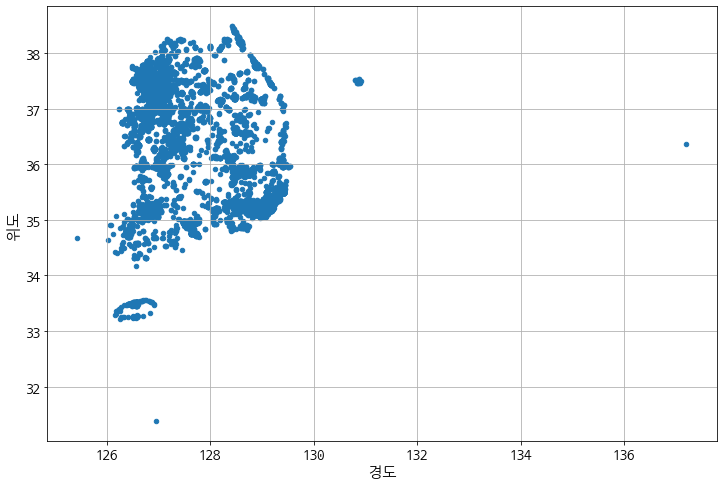

In [9]:
park_202308.plot.scatter(x='경도', y='위도', grid=True, figsize=(12, 8))
plt.show()

주소 전처리 => 도로명 주소가 NaN이면 지번 주소로 채운다.

In [10]:
# 도로명 주소가 NaN인 데이터의 개수 => 지번 주소만 입력된 데이터의 개수
# 도로명 주소만 입력되고 지번 주소가 입력되지 않은 데이터는 도로명 주소 제도가 시행되고 난 후 조성된 공원이다.
park_202308.소재지도로명주소.isnull().sum()

14559

In [11]:
# 도로명 주소는 입력되지 않고 지번 주소만 입력된 데이터
# 불린 인덱싱 작업시 and 조건이나 or 조건을 사용되면 and 연상 or 연산에 참여하는 데이터에 관계 연산자(%, |)가 사용되면
# 연산식 전체를 ()로 묶어준다.
# park_202308[park_202308.소재지도로명주소.isnull() == True & park_202308.소재지지번주소.notnull() == True]
# and 연산 or 연산에 참여하는 데이터 자체가 논리값이면 ()로 묶지 않아도 상관없다 .
park_202308[park_202308.소재지도로명주소.isnull() & park_202308.소재지지번주소.notnull()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
1,41570-00059,고촌어린이19(수기1공원),어린이공원,NaN,경기도 김포시 고촌읍 신곡리 1249,37.600127,126.767372,1715.0,031-980-5627,2022-10-18,4090000,경기도 김포시
2,41570-00060,고촌어린이20(수기2공원),어린이공원,NaN,경기도 김포시 고촌읍 신곡리 1260,37.596805,126.770145,1522.0,031-980-5627,2022-10-18,4090000,경기도 김포시
3,41570-00061,고촌어린이21(수기3공원),어린이공원,NaN,경기도 김포시 고촌읍 신곡리 1268,37.596252,126.767048,1567.0,031-980-5627,2022-10-18,4090000,경기도 김포시
4,41570-00063,항공소공원1,소공원,NaN,경기도 김포시 대곶면 대벽리 산66-56,37.617583,126.580436,1968.0,031-980-2344,2022-10-18,4090000,경기도 김포시
5,41570-00064,걸포어린이22,어린이공원,NaN,경기도 김포시 걸포동 1560,37.634949,126.705228,3450.0,031-980-5627,2022-10-18,4090000,경기도 김포시
...,...,...,...,...,...,...,...,...,...,...,...,...
18213,11500-00044,꿈돌이,어린이공원,NaN,서울특별시 강서구 화곡동 24-128,37.546097,126.845352,1507.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구
18214,11500-00045,소나무,어린이공원,NaN,서울특별시 강서구 화곡동 29-31,37.547058,126.847807,942.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구
18215,11500-00046,산새,어린이공원,NaN,서울특별시 강서구 화곡동 772,37.546268,126.850385,539.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구
18216,11500-00047,박장,어린이공원,NaN,서울특별시 강서구 화곡동 56-25,37.540768,126.849087,929.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구


In [12]:
# 지번 주소가 NaN인 데이터의 개수 => 도로명 주소만 입력된 데이터의 개수 
park_202308.소재지지번주소.isnull().sum()

163

In [13]:
# 도로명 주소는 입력되고 지번 주소가 입력되지 않은 데이터
park_202308[park_202308.소재지지번주소.notnull() & park_202308.소재지도로명주소.notnull()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
0,41390-00084,승지공원,근린공원,경기도 시흥시 능곡중앙로 85,경기도 시흥시 능곡동 552,37.371378,126.813132,10842.0,031-310-3869,2022-11-28,4010000,경기도 시흥시
14,41830-00020,강하 소공원,소공원,경기도 양평군 강하면 운심길 58,경기도 양평군 강하면 운심리 28-1,37.496164,127.412326,394.0,031-770-2358,2023-05-26,4170000,경기도 양평군
17,41830-00023,오빈14호 소공원,소공원,경기도 양평군 양평읍 오빈1리길12번길 4,경기도 양평군 양평읍 오빈리 88-46,37.507148,127.479103,404.0,031-770-2358,2023-05-26,4170000,경기도 양평군
18,41830-00024,오빈15호 소공원,소공원,경기도 양평군 양평읍 오빈1리길 9,경기도 양평군 양평읍 오빈리 81-32,37.506986,127.479677,293.0,031-770-2358,2023-05-26,4170000,경기도 양평군
54,27290-00154,은행어린이공원,어린이공원,대구광역시 달서구 월곡로20길 15-16,대구광역시 달서구 상인동 1589,35.806720,128.551337,1976.4,053-667-3636,2022-10-19,3470000,대구광역시 달서구
...,...,...,...,...,...,...,...,...,...,...,...,...
18114,31110-10005,새이골공원,근린공원,울산광역시 중구 달빛로 65-23 (약사동),울산광역시 중구 약사동 327-6,35.582211,129.333904,184653.6,052-290-4420,2022-11-18,3690000,울산광역시 중구
18156,42730-00024,안흥어린이공원3호,어린이공원,강원도 횡성군 안흥면 안흥동4길 28,강원도 횡성군 안흥면 안흥리 36-57,37.408713,128.158347,1510.0,033-340-2472,2021-12-22,4260000,강원도 횡성군
18175,48129-00031,석동2공원,근린공원,경상남도 창원시 진해구 석동로 66,경상남도 창원시 진해구 석동 657,35.155208,128.706573,10046.6,055-548-4501,2022-12-01,5670000,경상남도 창원시
18178,48129-00033,어린이공원,어린이공원,경상남도 창원시 진해구 냉천로129번길 17,경상남도 창원시 진해구 석동 661,35.155642,128.709718,1649.6,055-548-4501,2022-12-01,5670000,경상남도 창원시


In [14]:
# 도로명 주소와 지번 주소가 모두 입력되지 않은 데이터 
park_202308[park_202308.소재지지번주소.isnull() & park_202308.소재지도로명주소.isnull()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명


In [15]:
# 도로명 주소에 입력된 '-'를(경상북도 칠곡군) 누락값으로 변경한다.
park_202308[park_202308.소재지도로명주소 =='-']

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
4237,47850-00045,송림공원,수변공원,-,경상북도 칠곡군 동명면 구덕리 415,35.983928,128.567842,494957.0,054-979-5390,2020-07-16,5220000,경상북도 칠곡군
13819,47850-00033,삼청제1공원,어린이공원,-,경상북도 칠곡군 왜관읍 삼청리 477-7,35.983819,128.425973,900.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13820,47850-00034,왜관제4어린이공원,어린이공원,-,경상북도 칠곡군 왜관읍 왜관리 1449,35.978114,128.400493,2330.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13821,47850-00035,왜관소공원,소공원,-,경상북도 칠곡군 왜관읍 왜관리 1542,35.975735,128.399525,2330.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13822,47850-00036,아곡1소공원,소공원,-,경상북도 칠곡군 왜관읍 아곡리 829,36.010701,128.430388,1573.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13823,47850-00037,아곡2소공원,소공원,-,경상북도 칠곡군 왜관읍 아곡리 816,36.006775,128.432897,1491.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13824,47850-00038,연화공원(소공원),소공원,-,경상북도 칠곡군 지천면 연화리 1035,35.953046,128.457239,666.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13825,47850-00039,한실공원,근린공원,-,경상북도 칠곡군 왜관읍 삼청리 1100,35.970680,128.429810,23641.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13826,47850-00040,왜관3공단-1호공원,체육공원,-,경상북도 칠곡군 왜관읍 낙산리 1027,35.931220,128.418030,15000.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13827,47850-00041,왜관3공단-2호공원,소공원,-,경상북도 칠곡군 왜관읍 낙산리 1115,35.930070,128.422280,3947.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군


In [16]:
park_202308[park_202308.소재지도로명주소 =='-']

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
4237,47850-00045,송림공원,수변공원,-,경상북도 칠곡군 동명면 구덕리 415,35.983928,128.567842,494957.0,054-979-5390,2020-07-16,5220000,경상북도 칠곡군
13819,47850-00033,삼청제1공원,어린이공원,-,경상북도 칠곡군 왜관읍 삼청리 477-7,35.983819,128.425973,900.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13820,47850-00034,왜관제4어린이공원,어린이공원,-,경상북도 칠곡군 왜관읍 왜관리 1449,35.978114,128.400493,2330.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13821,47850-00035,왜관소공원,소공원,-,경상북도 칠곡군 왜관읍 왜관리 1542,35.975735,128.399525,2330.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13822,47850-00036,아곡1소공원,소공원,-,경상북도 칠곡군 왜관읍 아곡리 829,36.010701,128.430388,1573.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13823,47850-00037,아곡2소공원,소공원,-,경상북도 칠곡군 왜관읍 아곡리 816,36.006775,128.432897,1491.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13824,47850-00038,연화공원(소공원),소공원,-,경상북도 칠곡군 지천면 연화리 1035,35.953046,128.457239,666.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13825,47850-00039,한실공원,근린공원,-,경상북도 칠곡군 왜관읍 삼청리 1100,35.970680,128.429810,23641.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13826,47850-00040,왜관3공단-1호공원,체육공원,-,경상북도 칠곡군 왜관읍 낙산리 1027,35.931220,128.418030,15000.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13827,47850-00041,왜관3공단-2호공원,소공원,-,경상북도 칠곡군 왜관읍 낙산리 1115,35.930070,128.422280,3947.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군


In [17]:
park_202308.loc[park_202308.소재지도로명주소 == '-', '소재지도로명주소'] = np.NaN

In [18]:
park_202308[park_202308.소재지도로명주소 =='-']

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명


In [19]:
park_202308[park_202308.제공기관명 =='경상북도 칠곡군']

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
4237,47850-00045,송림공원,수변공원,NaN,경상북도 칠곡군 동명면 구덕리 415,35.983928,128.567842,494957.0,054-979-5390,2020-07-16,5220000,경상북도 칠곡군
13818,47850-00032,왜관공원,어린이공원,경상북도 칠곡군 왜관읍 중앙로 266,경상북도 칠곡군 왜관읍 석전리 792,35.998615,128.398044,7695.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13819,47850-00033,삼청제1공원,어린이공원,NaN,경상북도 칠곡군 왜관읍 삼청리 477-7,35.983819,128.425973,900.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13820,47850-00034,왜관제4어린이공원,어린이공원,NaN,경상북도 칠곡군 왜관읍 왜관리 1449,35.978114,128.400493,2330.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13821,47850-00035,왜관소공원,소공원,NaN,경상북도 칠곡군 왜관읍 왜관리 1542,35.975735,128.399525,2330.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13822,47850-00036,아곡1소공원,소공원,NaN,경상북도 칠곡군 왜관읍 아곡리 829,36.010701,128.430388,1573.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13823,47850-00037,아곡2소공원,소공원,NaN,경상북도 칠곡군 왜관읍 아곡리 816,36.006775,128.432897,1491.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13824,47850-00038,연화공원(소공원),소공원,NaN,경상북도 칠곡군 지천면 연화리 1035,35.953046,128.457239,666.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13825,47850-00039,한실공원,근린공원,NaN,경상북도 칠곡군 왜관읍 삼청리 1100,35.970680,128.429810,23641.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13826,47850-00040,왜관3공단-1호공원,체육공원,NaN,경상북도 칠곡군 왜관읍 낙산리 1027,35.931220,128.418030,15000.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군


In [20]:
# 도로명 주소가 NaN인 데이터를 지번 주소로 채운다. 
park_202308.소재지도로명주소.fillna(park_202308.소재지지번주소, inplace=True)
park_202308.소재지도로명주소.isnull().sum()

0

In [21]:
park_202308[park_202308.제공기관코드 == '5220000']

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
4237,47850-00045,송림공원,수변공원,경상북도 칠곡군 동명면 구덕리 415,경상북도 칠곡군 동명면 구덕리 415,35.983928,128.567842,494957.0,054-979-5390,2020-07-16,5220000,경상북도 칠곡군
13818,47850-00032,왜관공원,어린이공원,경상북도 칠곡군 왜관읍 중앙로 266,경상북도 칠곡군 왜관읍 석전리 792,35.998615,128.398044,7695.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13819,47850-00033,삼청제1공원,어린이공원,경상북도 칠곡군 왜관읍 삼청리 477-7,경상북도 칠곡군 왜관읍 삼청리 477-7,35.983819,128.425973,900.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13820,47850-00034,왜관제4어린이공원,어린이공원,경상북도 칠곡군 왜관읍 왜관리 1449,경상북도 칠곡군 왜관읍 왜관리 1449,35.978114,128.400493,2330.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13821,47850-00035,왜관소공원,소공원,경상북도 칠곡군 왜관읍 왜관리 1542,경상북도 칠곡군 왜관읍 왜관리 1542,35.975735,128.399525,2330.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13822,47850-00036,아곡1소공원,소공원,경상북도 칠곡군 왜관읍 아곡리 829,경상북도 칠곡군 왜관읍 아곡리 829,36.010701,128.430388,1573.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13823,47850-00037,아곡2소공원,소공원,경상북도 칠곡군 왜관읍 아곡리 816,경상북도 칠곡군 왜관읍 아곡리 816,36.006775,128.432897,1491.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13824,47850-00038,연화공원(소공원),소공원,경상북도 칠곡군 지천면 연화리 1035,경상북도 칠곡군 지천면 연화리 1035,35.953046,128.457239,666.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13825,47850-00039,한실공원,근린공원,경상북도 칠곡군 왜관읍 삼청리 1100,경상북도 칠곡군 왜관읍 삼청리 1100,35.970680,128.429810,23641.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군
13826,47850-00040,왜관3공단-1호공원,체육공원,경상북도 칠곡군 왜관읍 낙산리 1027,경상북도 칠곡군 왜관읍 낙산리 1027,35.931220,128.418030,15000.0,054-979-6832,2020-07-16,5220000,경상북도 칠곡군


CircleMarker를 표시하기 위해  '공원면적' 열에 적당한 수식을 실행해서  '공원면적비율' 열을 만든다.

In [22]:
# 시리즈에 저장된 데이터가 lambda 뒤의 변수로 한 건식 전달되고 수식을 실행한 후 apply() 메소드에 의해서 
# 지정된 시리즈에 일괄 적용된다.
# 시리즈.apply(lambda 변수: 수식)
park_202308['공원면적비율'] = park_202308.공원면적.apply(lambda x: np.sqrt(x) *0.01)
park_202308

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율
0,41390-00084,승지공원,근린공원,경기도 시흥시 능곡중앙로 85,경기도 시흥시 능곡동 552,37.371378,126.813132,10842.0,031-310-3869,2022-11-28,4010000,경기도 시흥시,1.041249
1,41570-00059,고촌어린이19(수기1공원),어린이공원,경기도 김포시 고촌읍 신곡리 1249,경기도 김포시 고촌읍 신곡리 1249,37.600127,126.767372,1715.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.414126
2,41570-00060,고촌어린이20(수기2공원),어린이공원,경기도 김포시 고촌읍 신곡리 1260,경기도 김포시 고촌읍 신곡리 1260,37.596805,126.770145,1522.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.390128
3,41570-00061,고촌어린이21(수기3공원),어린이공원,경기도 김포시 고촌읍 신곡리 1268,경기도 김포시 고촌읍 신곡리 1268,37.596252,126.767048,1567.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.395854
4,41570-00063,항공소공원1,소공원,경기도 김포시 대곶면 대벽리 산66-56,경기도 김포시 대곶면 대벽리 산66-56,37.617583,126.580436,1968.0,031-980-2344,2022-10-18,4090000,경기도 김포시,0.443621
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,11500-00044,꿈돌이,어린이공원,서울특별시 강서구 화곡동 24-128,서울특별시 강서구 화곡동 24-128,37.546097,126.845352,1507.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.388201
18214,11500-00045,소나무,어린이공원,서울특별시 강서구 화곡동 29-31,서울특별시 강서구 화곡동 29-31,37.547058,126.847807,942.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.306920
18215,11500-00046,산새,어린이공원,서울특별시 강서구 화곡동 772,서울특별시 강서구 화곡동 772,37.546268,126.850385,539.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.232164
18216,11500-00047,박장,어린이공원,서울특별시 강서구 화곡동 56-25,서울특별시 강서구 화곡동 56-25,37.540768,126.849087,929.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.304795


도로명 주소에서 공백을 경계로 분리해서 4번째 레벨까지 추가한다.

In [23]:
# split() 메소드 실행시 expand=True 옵션을 지정하면 구분자를 경계로 분리된 결과가 데이터프레임으로 만들어진다.
park_202308.소재지도로명주소.str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8
0,경기도,시흥시,능곡중앙로,85,None,None,None,None,None
1,경기도,김포시,고촌읍,신곡리,1249,None,None,None,None
2,경기도,김포시,고촌읍,신곡리,1260,None,None,None,None
3,경기도,김포시,고촌읍,신곡리,1268,None,None,None,None
4,경기도,김포시,대곶면,대벽리,산66-56,None,None,None,None
...,...,...,...,...,...,...,...,...,...
18213,서울특별시,강서구,화곡동,24-128,None,None,None,None,None
18214,서울특별시,강서구,화곡동,29-31,None,None,None,None,None
18215,서울특별시,강서구,화곡동,772,None,None,None,None,None
18216,서울특별시,강서구,화곡동,56-25,None,None,None,None,None


In [24]:
# 도로명 주소에서 공백으로 분리한 주소를 4번째 레벨까지 추가한다.
park_202308['주소1'] = park_202308.소재지도로명주소.str.split(' ', expand=True)[0]
park_202308['주소2'] = park_202308.소재지도로명주소.str.split(' ', expand=True)[1]
park_202308['주소3'] = park_202308.소재지도로명주소.str.split(' ', expand=True)[2]
park_202308['주소4'] = park_202308.소재지도로명주소.str.split(' ', expand=True)[3]
park_202308

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,주소1,주소2,주소3,주소4
0,41390-00084,승지공원,근린공원,경기도 시흥시 능곡중앙로 85,경기도 시흥시 능곡동 552,37.371378,126.813132,10842.0,031-310-3869,2022-11-28,4010000,경기도 시흥시,1.041249,경기도,시흥시,능곡중앙로,85
1,41570-00059,고촌어린이19(수기1공원),어린이공원,경기도 김포시 고촌읍 신곡리 1249,경기도 김포시 고촌읍 신곡리 1249,37.600127,126.767372,1715.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.414126,경기도,김포시,고촌읍,신곡리
2,41570-00060,고촌어린이20(수기2공원),어린이공원,경기도 김포시 고촌읍 신곡리 1260,경기도 김포시 고촌읍 신곡리 1260,37.596805,126.770145,1522.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.390128,경기도,김포시,고촌읍,신곡리
3,41570-00061,고촌어린이21(수기3공원),어린이공원,경기도 김포시 고촌읍 신곡리 1268,경기도 김포시 고촌읍 신곡리 1268,37.596252,126.767048,1567.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.395854,경기도,김포시,고촌읍,신곡리
4,41570-00063,항공소공원1,소공원,경기도 김포시 대곶면 대벽리 산66-56,경기도 김포시 대곶면 대벽리 산66-56,37.617583,126.580436,1968.0,031-980-2344,2022-10-18,4090000,경기도 김포시,0.443621,경기도,김포시,대곶면,대벽리
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,11500-00044,꿈돌이,어린이공원,서울특별시 강서구 화곡동 24-128,서울특별시 강서구 화곡동 24-128,37.546097,126.845352,1507.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.388201,서울특별시,강서구,화곡동,24-128
18214,11500-00045,소나무,어린이공원,서울특별시 강서구 화곡동 29-31,서울특별시 강서구 화곡동 29-31,37.547058,126.847807,942.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.306920,서울특별시,강서구,화곡동,29-31
18215,11500-00046,산새,어린이공원,서울특별시 강서구 화곡동 772,서울특별시 강서구 화곡동 772,37.546268,126.850385,539.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.232164,서울특별시,강서구,화곡동,772
18216,11500-00047,박장,어린이공원,서울특별시 강서구 화곡동 56-25,서울특별시 강서구 화곡동 56-25,37.540768,126.849087,929.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.304795,서울특별시,강서구,화곡동,56-25


위도, 경도 전처리 => 대한민국 영토 범위를 벗어난 위도, 경도와 입력되지 않은 위도,경도를 찾아 처리한다.

In [25]:
park_202308[['위도','경도']].describe()

,위도,경도
count,18216.000000,18216.000000
mean,36.547172,127.485003
std,1.041114,0.848186
min,31.373336,125.433011
25%,35.594268,126.872521
50%,36.824662,127.105409
75%,37.467922,128.143350
max,38.491555,137.202661


In [26]:
# 위도와 경도가 대한민국 영토 범위를 벗어난 데이터를 추출한다.
park_202308_error = park_202308[(park_202308.위도 < 32) | (park_202308.경도 > 132)]
park_202308_error
# 36.6314669,127.3320848 만수공원
# 37.3732256,126.9543456  제24호소공원

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,주소1,주소2,주소3,주소4
16456,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-4433,2020-07-16,5710000,충청북도 청주시,1.823678,충청북도,청주시,흥덕구,오송읍
16523,41173-00113,제24호소공원,소공원,경기도 안양시 동안구 호계동 1308,경기도 안양시 동안구 호계동 1308,31.373336,126.954253,2159.0,031-8045-5022,2022-11-15,3830000,경기도 안양시,0.464650,경기도,안양시,동안구,호계동


In [27]:
# 위도 경도가 입력되지 않은 데이터를 추출한다.
park_202308_error2 = park_202308[(park_202308.위도.isnull() | park_202308.경도.isnull())]
park_202308_error2
# (신청사)어린이공원 2 : 36.0756532 , 126.7029554
# (신청사) 소공원 : 36.0759432 , 126.70246568

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,주소1,주소2,주소3,주소4
7882,44770-25321,(신청사)어린이공원 2,어린이공원,충청남도 서천군 서천읍 군사리 60-5,충청남도 서천군 서천읍 군사리 60-5,NaN,NaN,1692.0,041-950-4438,2021-07-10,4580000,충청남도 서천군,0.411339,충청남도,서천군,서천읍,군사리
7884,44770-25321,(신청사) 소공원,소공원,충청남도 서천군 서천읍 군사리 51-8,충청남도 서천군 서천읍 군사리 51-8,NaN,NaN,5189.0,041-950-4438,2021-07-10,4580000,충청남도 서천군,0.720347,충청남도,서천군,서천읍,군사리


In [28]:
# 위도와 경도가 올바른 데이터만 추출한다. 
park_202308_ok = park_202308[(park_202308.위도 >= 32) & (park_202308.경도 <= 132)]
park_202308_ok

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,주소1,주소2,주소3,주소4
0,41390-00084,승지공원,근린공원,경기도 시흥시 능곡중앙로 85,경기도 시흥시 능곡동 552,37.371378,126.813132,10842.0,031-310-3869,2022-11-28,4010000,경기도 시흥시,1.041249,경기도,시흥시,능곡중앙로,85
1,41570-00059,고촌어린이19(수기1공원),어린이공원,경기도 김포시 고촌읍 신곡리 1249,경기도 김포시 고촌읍 신곡리 1249,37.600127,126.767372,1715.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.414126,경기도,김포시,고촌읍,신곡리
2,41570-00060,고촌어린이20(수기2공원),어린이공원,경기도 김포시 고촌읍 신곡리 1260,경기도 김포시 고촌읍 신곡리 1260,37.596805,126.770145,1522.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.390128,경기도,김포시,고촌읍,신곡리
3,41570-00061,고촌어린이21(수기3공원),어린이공원,경기도 김포시 고촌읍 신곡리 1268,경기도 김포시 고촌읍 신곡리 1268,37.596252,126.767048,1567.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.395854,경기도,김포시,고촌읍,신곡리
4,41570-00063,항공소공원1,소공원,경기도 김포시 대곶면 대벽리 산66-56,경기도 김포시 대곶면 대벽리 산66-56,37.617583,126.580436,1968.0,031-980-2344,2022-10-18,4090000,경기도 김포시,0.443621,경기도,김포시,대곶면,대벽리
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,11500-00044,꿈돌이,어린이공원,서울특별시 강서구 화곡동 24-128,서울특별시 강서구 화곡동 24-128,37.546097,126.845352,1507.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.388201,서울특별시,강서구,화곡동,24-128
18214,11500-00045,소나무,어린이공원,서울특별시 강서구 화곡동 29-31,서울특별시 강서구 화곡동 29-31,37.547058,126.847807,942.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.306920,서울특별시,강서구,화곡동,29-31
18215,11500-00046,산새,어린이공원,서울특별시 강서구 화곡동 772,서울특별시 강서구 화곡동 772,37.546268,126.850385,539.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.232164,서울특별시,강서구,화곡동,772
18216,11500-00047,박장,어린이공원,서울특별시 강서구 화곡동 56-25,서울특별시 강서구 화곡동 56-25,37.540768,126.849087,929.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.304795,서울특별시,강서구,화곡동,56-25


주소 전처리

In [29]:
park_202308_ok.주소1.value_counts()

경기도        4438
서울특별시      1939
충청남도       1681
경상남도       1223
강원도        1104
전라남도       1048
경상북도       1014
광주광역시       889
충청북도        788
인천광역시       728
부산광역시       693
전라북도        674
대구광역시       644
울산광역시       469
대전광역시       448
제주특별자치도     252
강원특별자치도     111
세종특별자치시      70
대전            1
Name: 주소1, dtype: int64

In [30]:
# '주소1' 컬럼이 '대전' 인 데이터를 ' 대전광역시'라한다.
park_202308_ok.loc[park_202308_ok.주소1 == '대전','주소1'] ='대전광역시'
# '주소1' 컬럼이 '강원도' 인 데이터를 '강원특별자치도'로 수정한다.
park_202308_ok.loc[park_202308_ok.주소1 == '강원도','주소1'] ='강원특별자치도'

In [31]:
park_202308_ok.주소1.value_counts()

경기도        4438
서울특별시      1939
충청남도       1681
경상남도       1223
강원특별자치도    1215
전라남도       1048
경상북도       1014
광주광역시       889
충청북도        788
인천광역시       728
부산광역시       693
전라북도        674
대구광역시       644
울산광역시       469
대전광역시       449
제주특별자치도     252
세종특별자치시      70
Name: 주소1, dtype: int64

시도별 공원 데이터 시각화

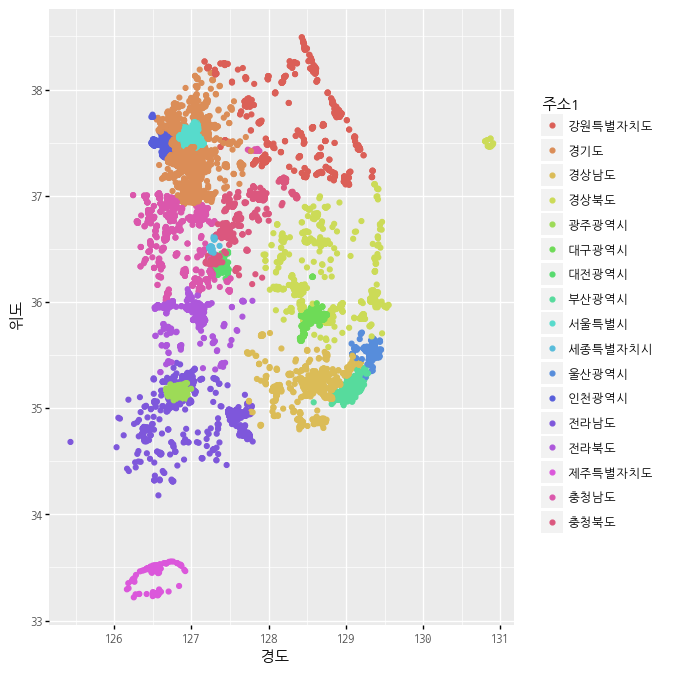

<ggplot: (183880378800)>

In [32]:
(
    ggplot(park_202308_ok, aes(x='경도', y='위도', color='주소1'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(6,8))
         
)

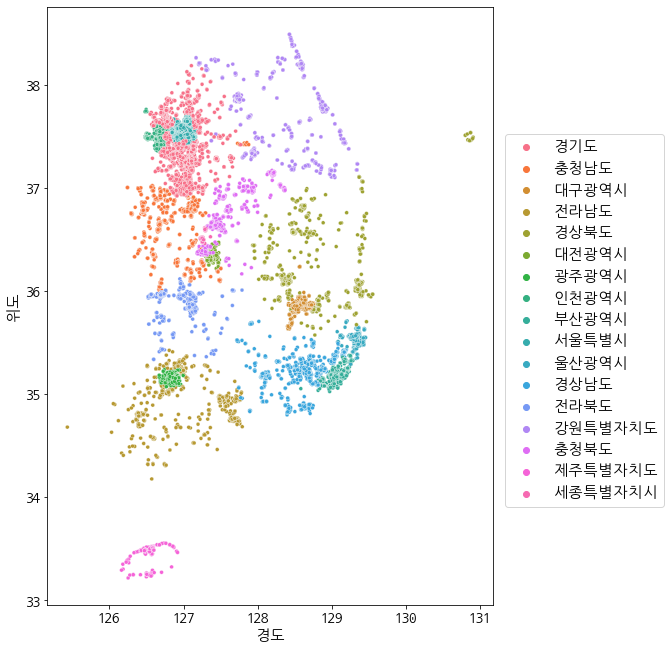

In [33]:
plt.figure(figsize=(8,11))
sns.scatterplot(data=park_202308_ok, x='경도', y='위도', hue='주소1', s=15)
plt.legend(loc=1, bbox_to_anchor=(1.4,0.8)) # 범례 위치
plt.show()

공원 구분별 분포현황

In [34]:
park_202308_ok.공원구분.value_counts()

어린이공원       9413
근린공원        4042
소공원         2854
기타           569
문화공원         407
수변공원         341
체육공원         259
역사공원         195
마을마당          49
묘지공원          39
기타공원          30
도시농업공원         7
주제공원           2
도시자연공원         2
도시자연공원구역       2
어린인공원          1
공공공지           1
가로공원           1
Name: 공원구분, dtype: int64

In [35]:
# '공원구분' 컬럼이 '기타공원' 인 데이터를 ' 기타'라한다.
park_202308_ok.loc[park_202308_ok.공원구분 == '기타공원','공원구분'] ='기타'
# '공원구분' 컬럼이 '어린인공원' 인 데이터를 ' 어린이공원'라한다.
park_202308_ok.loc[park_202308_ok.공원구분 == '어린인공원','공원구분'] ='어린이공원'
# '공원구분' 컬럼이 '도시자연공원구역' 인 데이터를 '도시자연공원'라한다.
park_202308_ok.loc[park_202308_ok.공원구분 == '도시자연공원구역','공원구분'] ='도시자연공원'

In [36]:
park_202308_ok.공원구분.value_counts()

어린이공원     9414
근린공원      4042
소공원       2854
기타         599
문화공원       407
수변공원       341
체육공원       259
역사공원       195
마을마당        49
묘지공원        39
도시농업공원       7
도시자연공원       4
주제공원         2
공공공지         1
가로공원         1
Name: 공원구분, dtype: int64

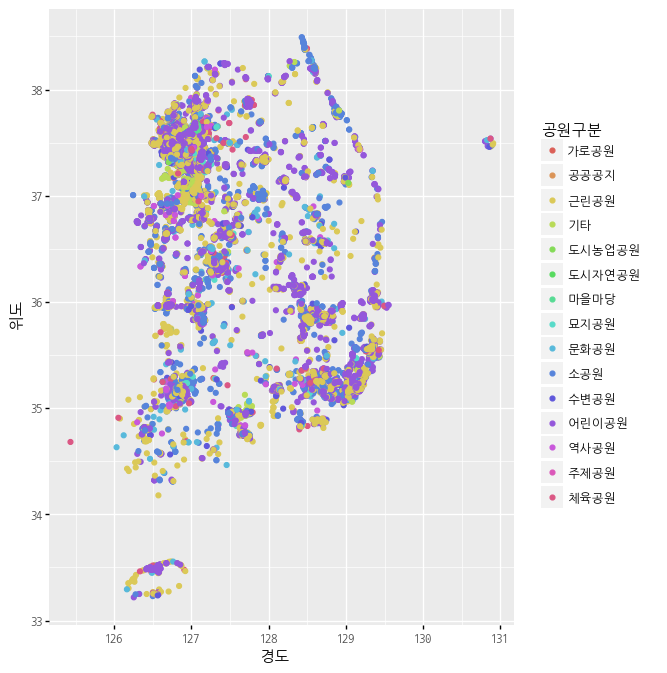

<ggplot: (-9223371852973779319)>

In [37]:
(
    ggplot(park_202308_ok, aes(x='경도', y='위도', color='공원구분'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(6,8))
)

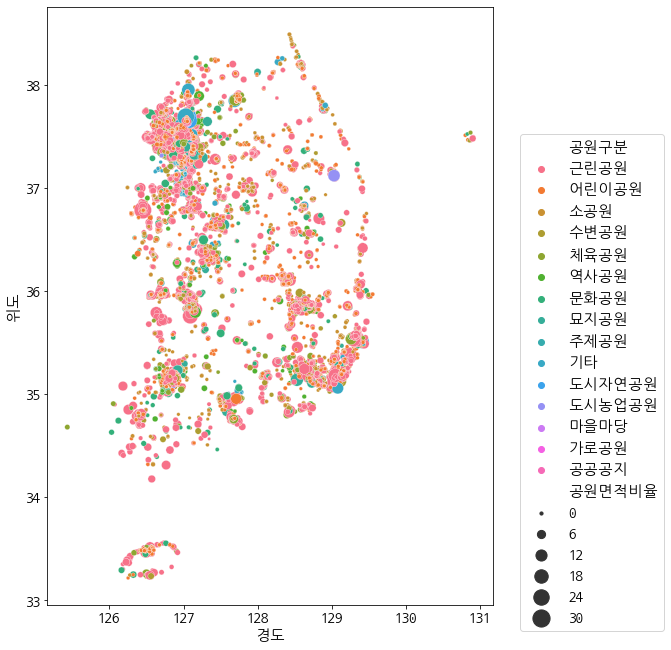

In [38]:
plt.figure(figsize=(8,11))
sns.scatterplot(data=park_202308_ok, x='경도', y='위도', hue='공원구분',size='공원면적비율' , sizes=(10,300))
plt.legend(loc=1, bbox_to_anchor=(1.4,0.8)) # 범례 위치
plt.show()

어린이공원을 제외한 공원 

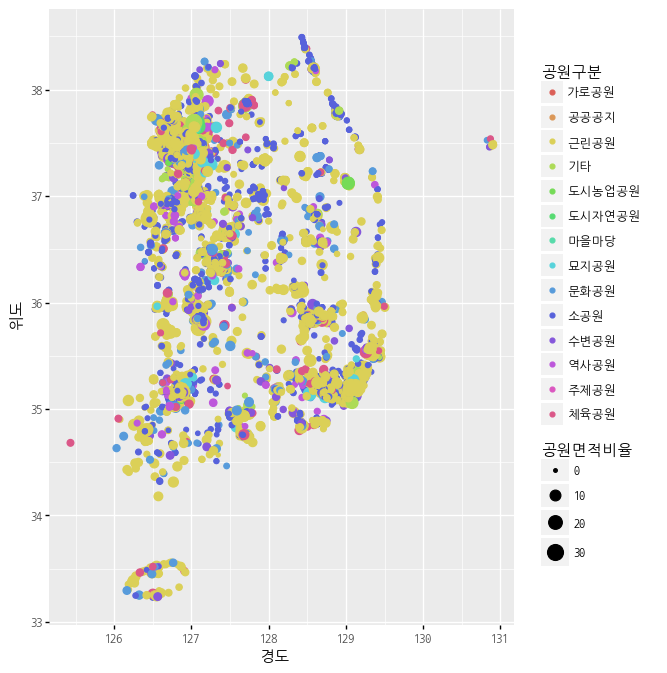

<ggplot: (-9223371852974312381)>

In [39]:
(
    ggplot(park_202308_ok[park_202308_ok.공원구분 != '어린이공원'], aes(x='경도', y='위도', color='공원구분', size='공원면적비율'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(6,8))
)

시도별 공원 비율

In [40]:
# value_counts() 메소드는 시도별 개수 또는 전체개수에 대한 비율을 계산한다.
# value_counts() 메소드의 normalize옵션의 기본값은 False이고 개수를 계산하고 True로 지정하면 전체개수에 대한 비율을 계산한다.
# value_counts() 메소드의 ascending 옵션의 기본값은 False이고 내림차순으로 정렬하고 True로 지정하면 오름차순으로 정렬한다.
# value_counts() 메소드의 dropna 옵션의 기본값은 True이고 NaN을 무시하고 False로 변경하면 NaN을 포함시켜 계산한다.
park_sum = pd.DataFrame(park_202308_ok.주소1.value_counts()) # normalize=False, ascending=False , dropna=True
park_sum.head()

,주소1
경기도,4438
서울특별시,1939
충청남도,1681
경상남도,1223
강원특별자치도,1215


In [41]:
park_per = pd.DataFrame(park_202308_ok.주소1.value_counts(normalize=True))
park_per.head()

,주소1
경기도,0.243659
서울특별시,0.106457
충청남도,0.092292
경상남도,0.067146
강원특별자치도,0.066707


In [42]:
# 시도별 개수 데이터와 전체 개수에 대한 비율 데이터를 병합한다.
# 병합하려는 데이터프레임에 병합 기준을 인덱스로 지정하려면 left_index 옵션과 right_index 옵션을 각각 True로 지정한다.
park_sido = park_sum.merge(park_per, left_index=True, right_index=True).reset_index()
# 병합된 데이터프레임의 열 이름을 변경한다.
park_sido.columns = ['시도', '개수', '비율']
park_sido

,시도,개수,비율
0,경기도,4438,0.243659
1,서울특별시,1939,0.106457
2,충청남도,1681,0.092292
3,경상남도,1223,0.067146
4,강원특별자치도,1215,0.066707
5,전라남도,1048,0.057538
6,경상북도,1014,0.055671
7,광주광역시,889,0.048809
8,충청북도,788,0.043263
9,인천광역시,728,0.039969


In [43]:
park_sum = pd.DataFrame(park_202308_ok.주소1.value_counts()).reset_index()
park_sum.columns = ['시도', '개수']
park_sum.head()

,시도,개수
0,경기도,4438
1,서울특별시,1939
2,충청남도,1681
3,경상남도,1223
4,강원특별자치도,1215


In [44]:
park_per = pd.DataFrame(park_202308_ok.주소1.value_counts(normalize=True)).reset_index()
park_per.columns = ['시도', '비율']
park_per.head()

,시도,비율
0,경기도,0.243659
1,서울특별시,0.106457
2,충청남도,0.092292
3,경상남도,0.067146
4,강원특별자치도,0.066707


In [45]:
park_sido = park_sum.merge(park_per, left_on='시도', right_on='시도')
# 시도에 대해 내림차순으로 정렬하고 데이터프레임에 결과를 즉시 반영한다.
#park_sido.sort_values(by=['시도'], ascending=False, inplace=True)
park_sido

,시도,개수,비율
0,경기도,4438,0.243659
1,서울특별시,1939,0.106457
2,충청남도,1681,0.092292
3,경상남도,1223,0.067146
4,강원특별자치도,1215,0.066707
5,전라남도,1048,0.057538
6,경상북도,1014,0.055671
7,광주광역시,889,0.048809
8,충청북도,788,0.043263
9,인천광역시,728,0.039969


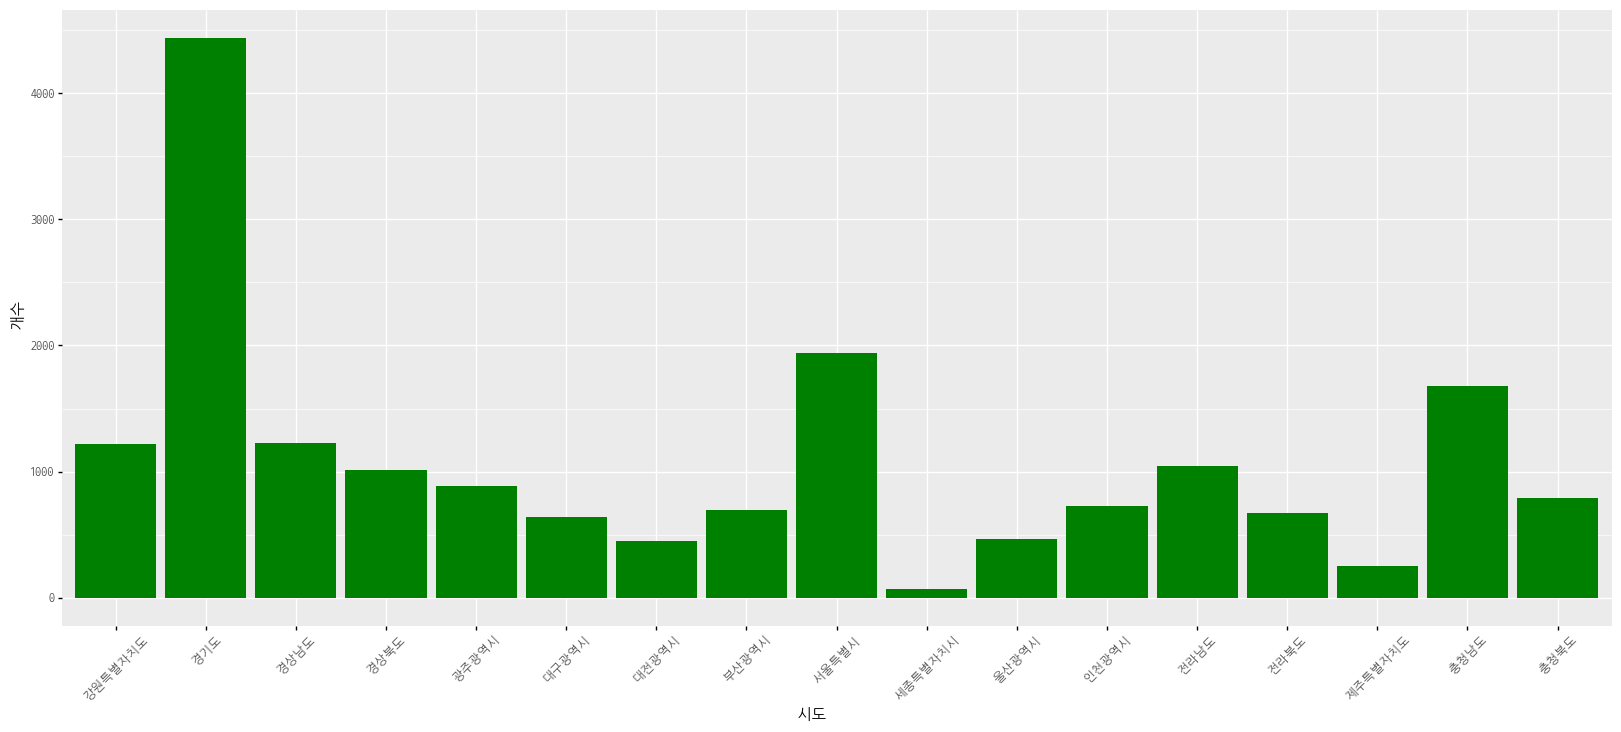

<ggplot: (183886319417)>

In [64]:
(
    ggplot(park_sido, aes(x='시도',y='개수'))
    +geom_bar(stat='identity', position='dodge', fill='green')
    +theme(text=element_text(family='NanumGothicCoding'), figure_size=(20,8), axis_text_x=element_text(rotation=45))
)

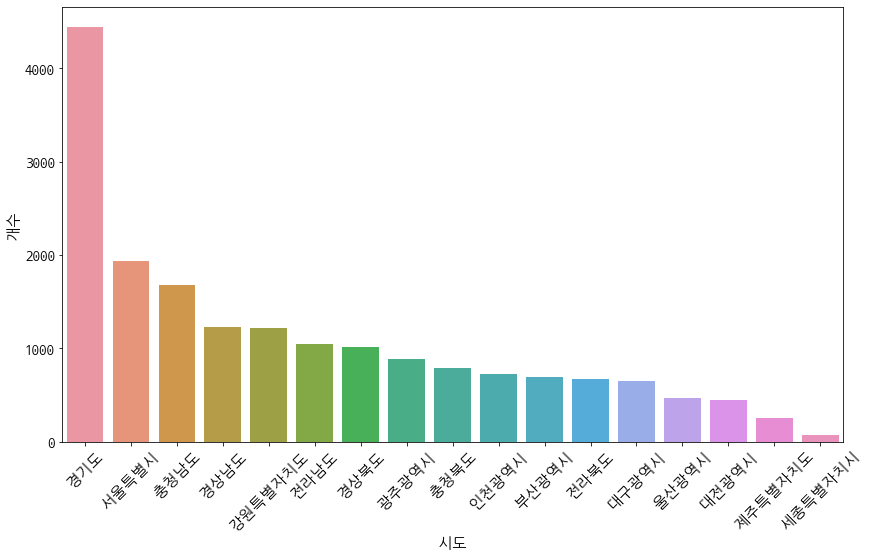

In [59]:
# y 축 갯수의 내림차순으로 경렬 진행
plt.figure(figsize=(14,8))
ax = sns.barplot(data=park_sido, x='시도', y='개수')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [60]:
# https://plotnine.readthedocs.io/en/v0.12.3/tutorials/miscellaneous-order-plot-series.html
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

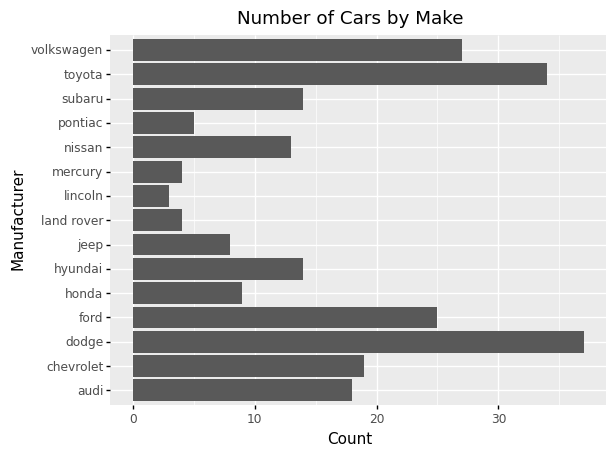

<ggplot: (-9223371852968104718)>

In [66]:
(
    ggplot(mpg)
     + aes(x='manufacturer')
     + geom_bar(size=20)
     + coord_flip() # 세로 막대 그래프를 만든다. 위에 이식해도됨
     + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

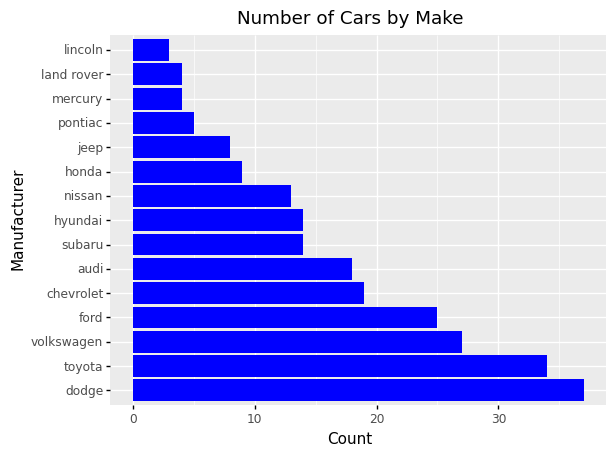

<ggplot: (-9223371852968284742)>

In [71]:
# 데이터의 순서를 결정하고 범주형 데이터 유형을 생성합니다.
# value_counts()는 이미 정렬되어 있음에 유의하십시오.
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()
manufacturer_cat = pd.Categorical(mpg['manufacturer'], categories=manufacturer_list)

# DataFrame에 새 열을 할당합니다.
mpg = mpg.assign(manufacturer_cat = manufacturer_cat)

(ggplot(mpg)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20 , fill='blue')
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

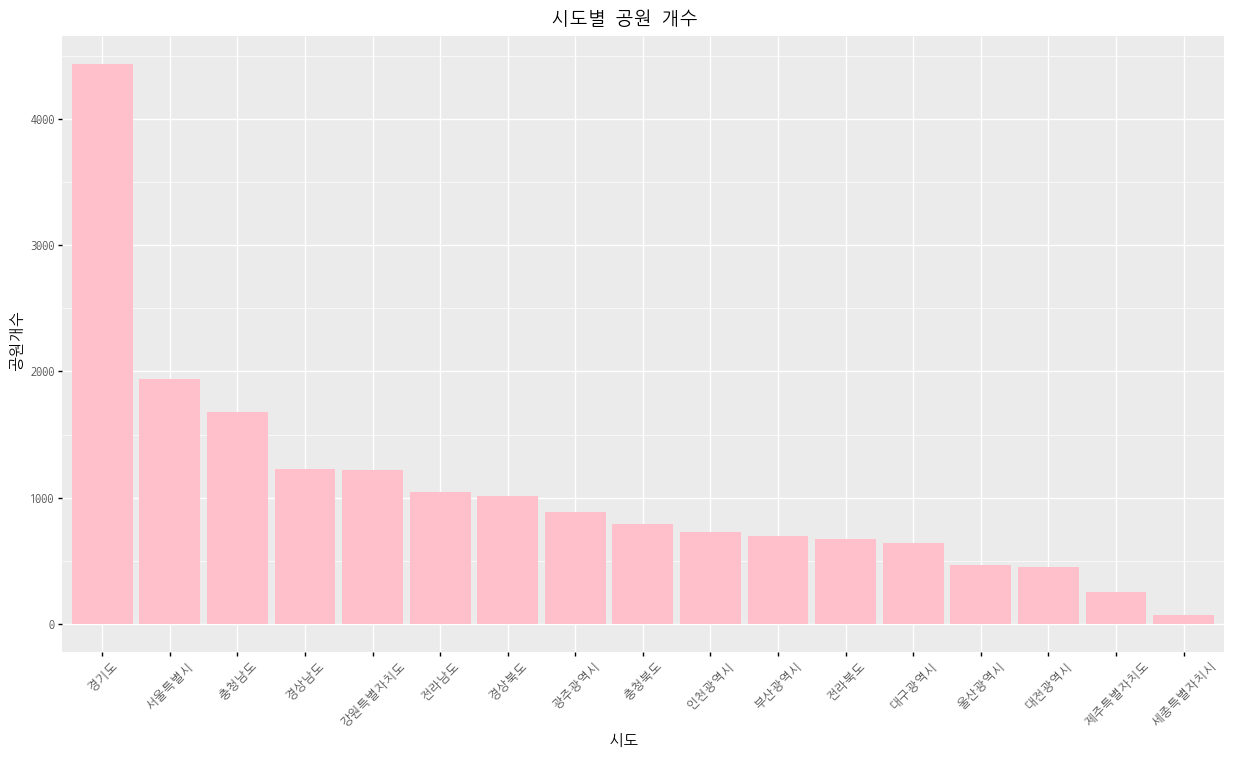

<ggplot: (183879997104)>

In [97]:
park_list = park_202308_ok['주소1'].value_counts().index.tolist()
parkList = pd.Categorical(park_202308_ok['주소1'], categories=park_list)
park_202308_ok = park_202308_ok.assign(공원목록 = parkList)


(
    ggplot(park_202308_ok)
     + aes(x='공원목록')
     + geom_bar(size=20 , fill='pink')
 #    + coord_flip()
     + labs(y='공원개수', x='시도', title='시도별 공원 개수')
     + theme(text=element_text(family='NanumGothicCoding'), figure_size=(15,8), axis_text_x=element_text(rotation=45))
)

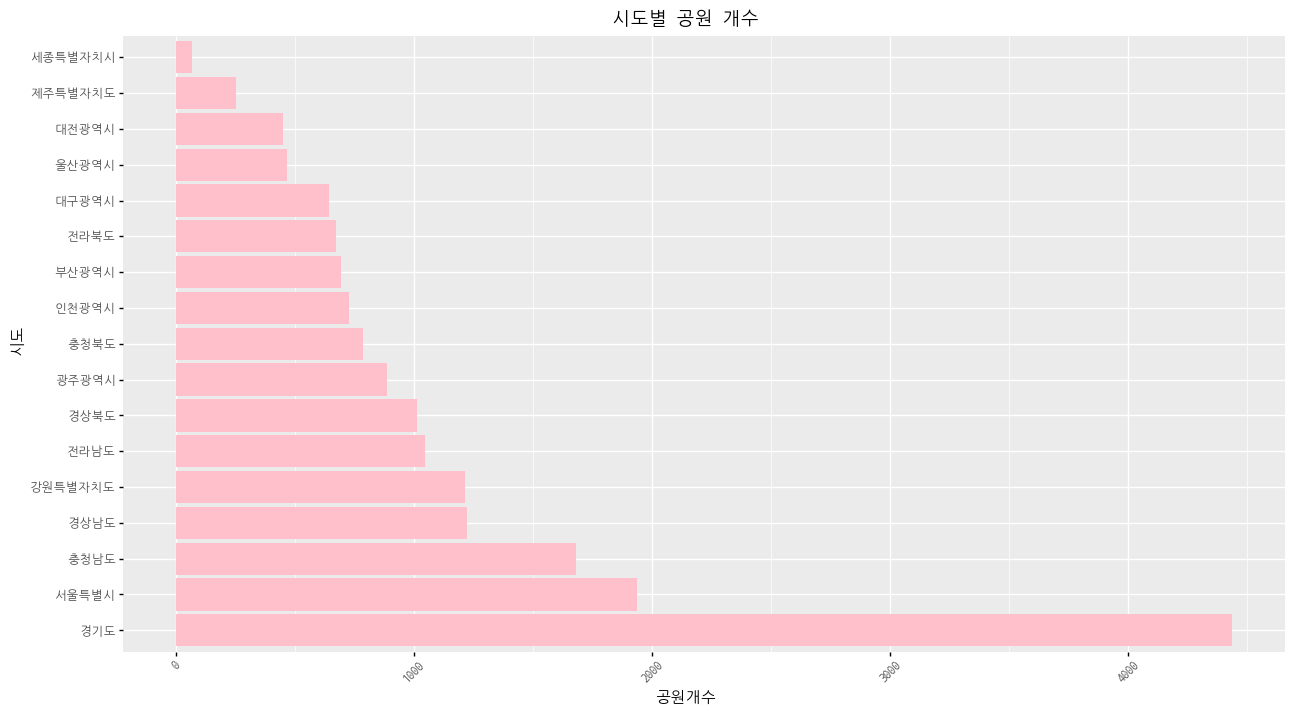

<ggplot: (-9223371852974248125)>

In [99]:
park_list = park_202308_ok['주소1'].value_counts().index.tolist()
parkList = pd.Categorical(park_202308_ok['주소1'], categories=park_list)
park_202308_ok = park_202308_ok.assign(공원목록 = parkList)

(
    ggplot(park_202308_ok)
     + aes(x='공원목록')
     + geom_bar(size=20 , fill='pink')
     + coord_flip()
     + labs(y='공원개수', x='시도', title='시도별 공원 개수')
     + theme(text=element_text(family='NanumGothicCoding'), figure_size=(15,8), axis_text_x=element_text(rotation=45))
)

공원 구분별 개수

In [106]:
park_type = pd.DataFrame(park_202308_ok.공원구분.value_counts()).reset_index()
park_type.columns =['공원구분','개수']
park_type

,공원구분,개수
0,어린이공원,9414
1,근린공원,4042
2,소공원,2854
3,기타,599
4,문화공원,407
5,수변공원,341
6,체육공원,259
7,역사공원,195
8,마을마당,49
9,묘지공원,39


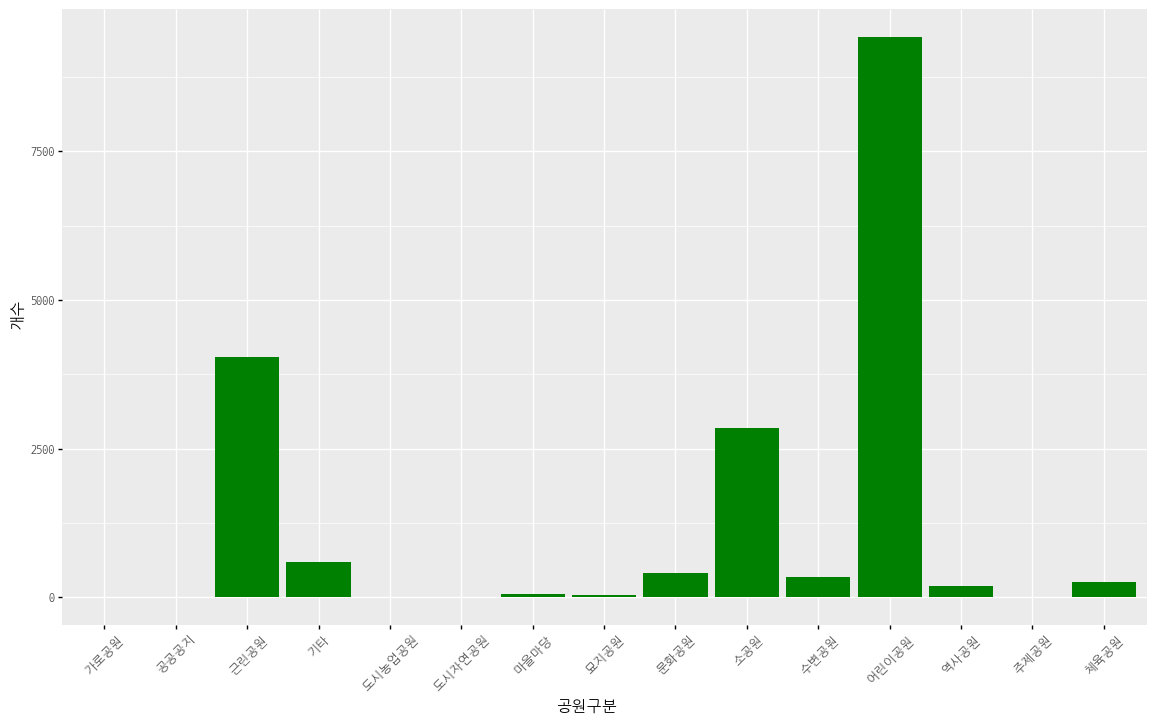

<ggplot: (183886250658)>

In [108]:
(
    ggplot(park_type, aes(x='공원구분',y='개수'))
    +geom_bar(stat='identity', position='dodge', fill='green')
    +theme(text=element_text(family='NanumGothicCoding'), figure_size=(14,8),
           axis_text_x=element_text(rotation=45))
)

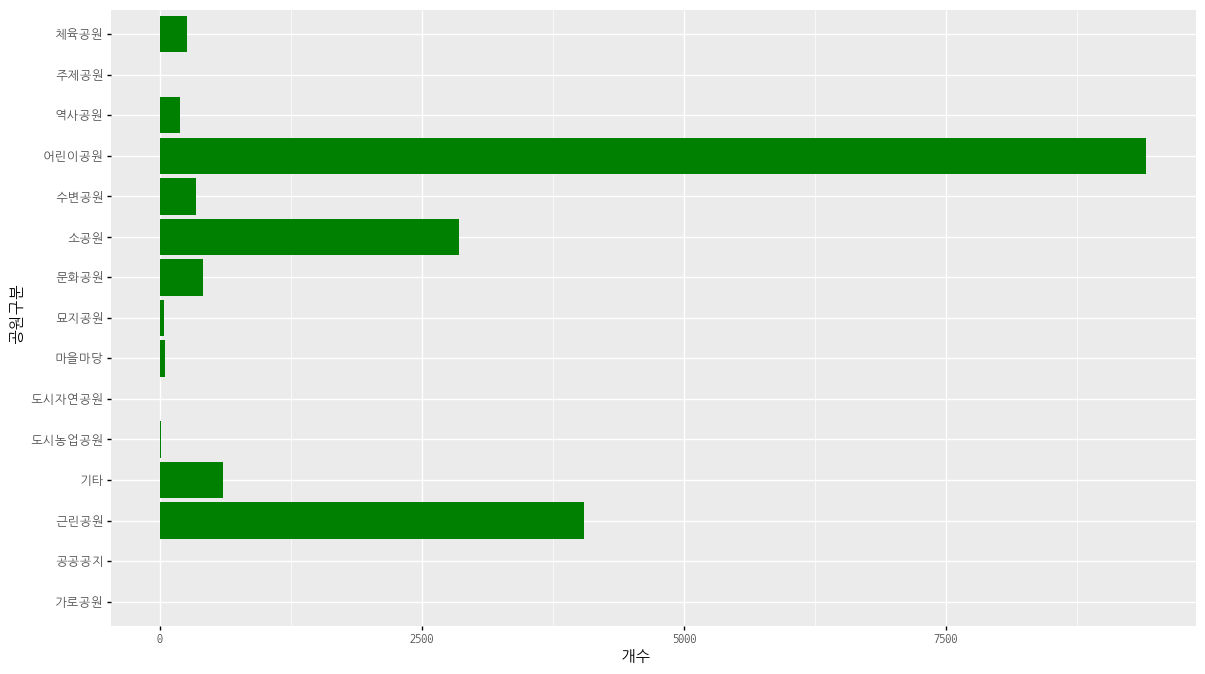

<ggplot: (183887192808)>

In [111]:
(
    ggplot(park_type, aes(x='공원구분',y='개수'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + coord_flip()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(14,8))
)

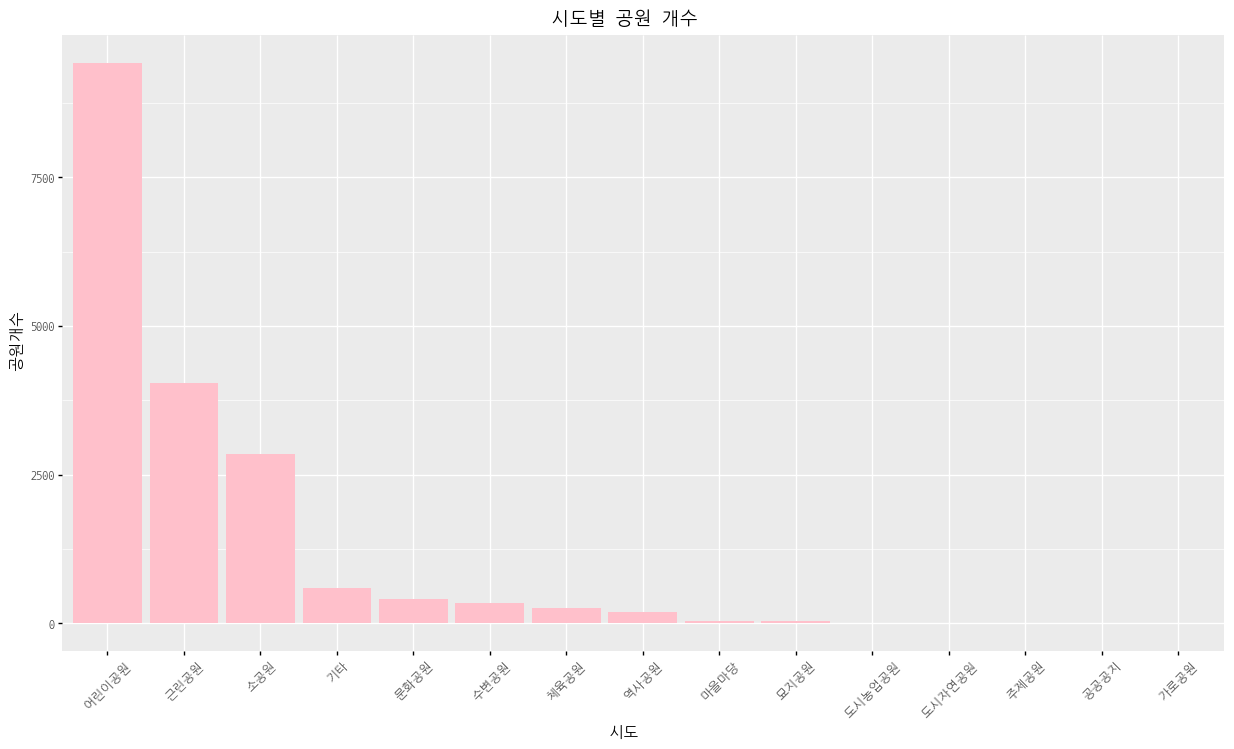

<ggplot: (183889877901)>

In [114]:
park_list = park_202308_ok['공원구분'].value_counts().index.tolist()
parkList = pd.Categorical(park_202308_ok['공원구분'], categories=park_list)
park_202308_ok = park_202308_ok.assign(공원목록 = parkList)

(
    ggplot(park_202308_ok)
     + aes(x='공원목록')
     + geom_bar(size=20 , fill='pink')
     + labs(y='공원개수', x='시도', title='시도별 공원 개수')
     + theme(text=element_text(family='NanumGothicCoding'), figure_size=(15,8), axis_text_x=element_text(rotation=45))
)

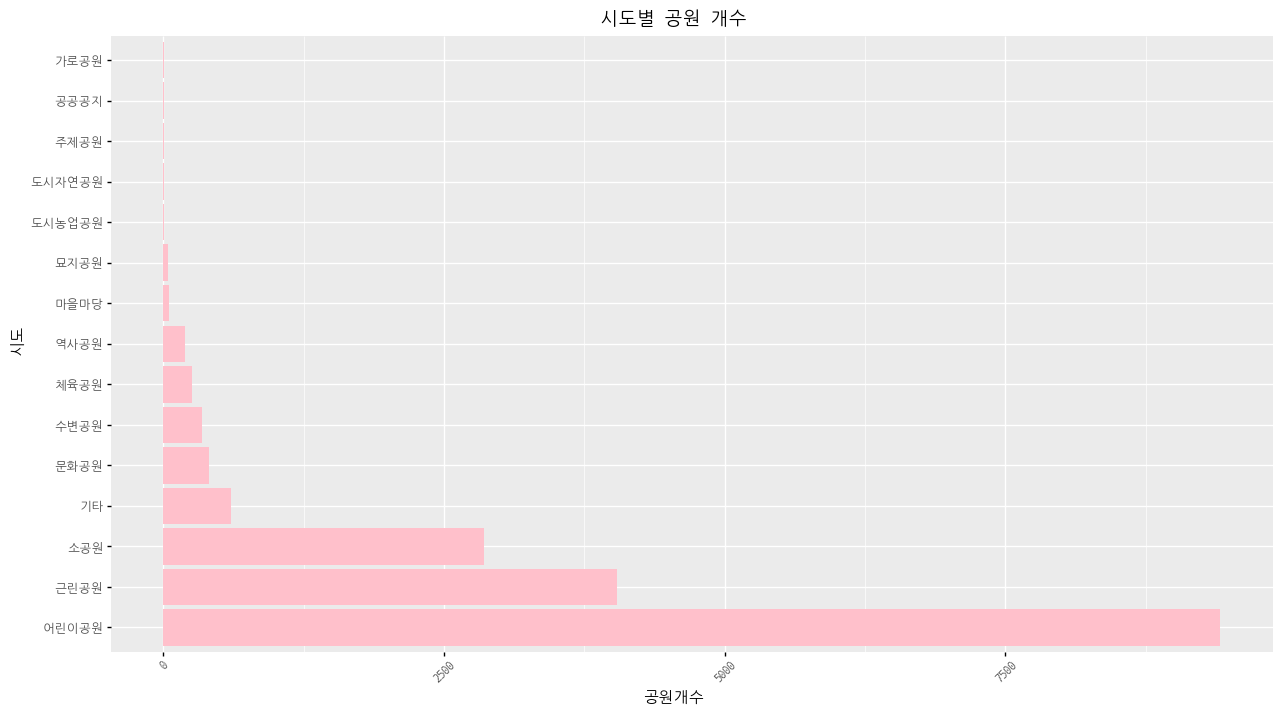

<ggplot: (183886079229)>

In [115]:
park_list = park_202308_ok['공원구분'].value_counts().index.tolist()
parkList = pd.Categorical(park_202308_ok['공원구분'], categories=park_list)
park_202308_ok = park_202308_ok.assign(공원목록 = parkList)

(
    ggplot(park_202308_ok)
     + aes(x='공원목록')
     + geom_bar(size=20 , fill='pink')
     + coord_flip()
     + labs(y='공원개수', x='시도', title='시도별 공원 개수')
     + theme(text=element_text(family='NanumGothicCoding'), figure_size=(15,8), axis_text_x=element_text(rotation=45))
)

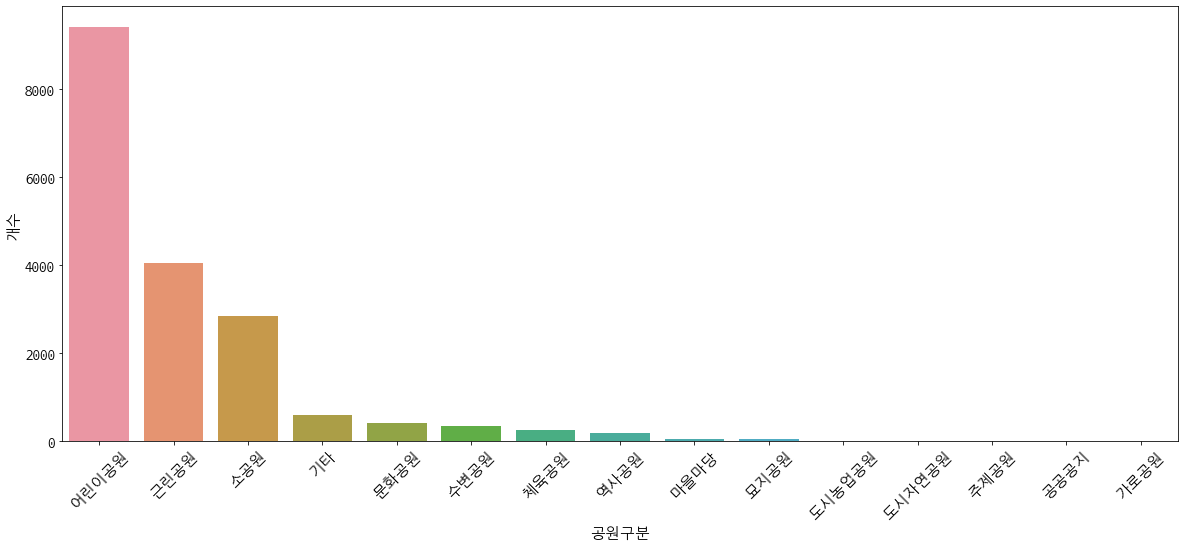

In [117]:
plt.figure(figsize=(20,8))
ax = sns.barplot(data=park_type, x='공원구분', y='개수')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [118]:
gyeonggi = park_202308_ok[park_202308_ok.주소1 =='경기도']
gyeonggi

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,주소1,주소2,주소3,주소4,공원목록
0,41390-00084,승지공원,근린공원,경기도 시흥시 능곡중앙로 85,경기도 시흥시 능곡동 552,37.371378,126.813132,10842.0,031-310-3869,2022-11-28,4010000,경기도 시흥시,1.041249,경기도,시흥시,능곡중앙로,85,근린공원
1,41570-00059,고촌어린이19(수기1공원),어린이공원,경기도 김포시 고촌읍 신곡리 1249,경기도 김포시 고촌읍 신곡리 1249,37.600127,126.767372,1715.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.414126,경기도,김포시,고촌읍,신곡리,어린이공원
2,41570-00060,고촌어린이20(수기2공원),어린이공원,경기도 김포시 고촌읍 신곡리 1260,경기도 김포시 고촌읍 신곡리 1260,37.596805,126.770145,1522.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.390128,경기도,김포시,고촌읍,신곡리,어린이공원
3,41570-00061,고촌어린이21(수기3공원),어린이공원,경기도 김포시 고촌읍 신곡리 1268,경기도 김포시 고촌읍 신곡리 1268,37.596252,126.767048,1567.0,031-980-5627,2022-10-18,4090000,경기도 김포시,0.395854,경기도,김포시,고촌읍,신곡리,어린이공원
4,41570-00063,항공소공원1,소공원,경기도 김포시 대곶면 대벽리 산66-56,경기도 김포시 대곶면 대벽리 산66-56,37.617583,126.580436,1968.0,031-980-2344,2022-10-18,4090000,경기도 김포시,0.443621,경기도,김포시,대곶면,대벽리,소공원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18091,41220-00216,LG Digital Park일반산업단지 근린공원,근린공원,경기도 평택시 진위면 엘지로 222,경기도 평택시 진위면 청호리 367,37.128946,127.091568,19939.5,031-8024-4248,2023-02-10,3910000,경기도 평택시,1.412073,경기도,평택시,진위면,엘지로,근린공원
18092,41220-00217,가곡 근린공원,근린공원,경기도 평택시 진위면 가곡1길 39,경기도 평택시 진위면 가곡리 70-1,37.112580,127.087180,18268.0,031-8024-4248,2023-02-10,3910000,경기도 평택시,1.351592,경기도,평택시,진위면,가곡1길,근린공원
18093,41220-00218,갈곶 근린공원(진위제2산업단지),근린공원,경기도 평택시 진위면 갈곶리 118,경기도 평택시 진위면 갈곶리 118,37.123960,127.079289,12781.0,031-8024-4248,2023-02-10,3910000,경기도 평택시,1.130531,경기도,평택시,진위면,갈곶리,근린공원
18094,41220-00219,견산 근린공원,근린공원,경기도 평택시 진위면 견산리 산9임,경기도 평택시 진위면 견산리 산9임,37.107238,127.077771,53243.0,031-8024-4248,2023-02-10,3910000,경기도 평택시,2.307444,경기도,평택시,진위면,견산리,근린공원


In [124]:
gyeonggi_type = pd.DataFrame(gyeonggi.공원구분.value_counts()).reset_index()
gyeonggi_type.columns =['공원구분', '개수']
gyeonggi_type

,공원구분,개수
0,어린이공원,2129
1,근린공원,1007
2,소공원,519
3,기타,389
4,문화공원,127
5,수변공원,108
6,체육공원,105
7,역사공원,39
8,묘지공원,12
9,도시농업공원,2


In [134]:
gyeonggi_map = folium.Map(location=[gyeonggi.위도.mean(),gyeonggi.경도.mean()], zoom_start=10)
for index, data in gyeonggi.iterrows():
    parkName = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소),max_width=300)
    folium.Marker(location=[data.위도,data.경도], popup=parkName).add_to(gyeonggi_map)
# gyeonggi_map   #실행하면 프레임떨어짐 (맵출력하는거)

In [141]:
suwon = park_202308_ok[park_202308_ok.주소2 =='수원시']
suwon

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,주소1,주소2,주소3,주소4,공원목록
10250,41117-00014,열림,근린공원,경기도 수원시 영통구 웰빙타운로 73,경기도 수원시 영통구 이의동1183,37.305557,127.043153,152646.2,031-228-8331,2023-06-20,3740000,경기도 수원시,3.906996,경기도,수원시,영통구,웰빙타운로,근린공원
10251,41117-00015,성죽,근린공원,경기도 수원시 영통구 이의동 1213,경기도 수원시 영통구 이의동 1213,37.309474,127.048074,73873.5,031-228-8331,2023-06-20,3740000,경기도 수원시,2.717968,경기도,수원시,영통구,이의동,근린공원
10252,41117-00016,솔내,근린공원,경기도 수원시 영통구 이의동 1215,경기도 수원시 영통구 이의동 1215,37.308184,127.051022,24489.3,031-228-8331,2023-06-20,3740000,경기도 수원시,1.564906,경기도,수원시,영통구,이의동,근린공원
10253,41117-00017,연암,근린공원,경기도 수원시 영통구 이의동 1288,경기도 수원시 영통구 이의동 1288,37.294502,127.036434,128896.7,031-228-8331,2023-06-20,3740000,경기도 수원시,3.590219,경기도,수원시,영통구,이의동,근린공원
10254,41117-00018,망포,근린공원,경기도 수원시 영통구 망포동 358-5,경기도 수원시 영통구 망포동 358-5,37.242464,127.057720,15990.6,031-228-8331,2023-06-20,3740000,경기도 수원시,1.264539,경기도,수원시,영통구,망포동,근린공원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,41111-00041,백설,어린이공원,경기도 수원시 장안구 정자천로 133번길 26,경기도 수원시 장안구 정자동 879-2,37.295134,126.991115,2999.9,031-228-5995,2023-06-20,3740000,경기도 수원시,0.547713,경기도,수원시,장안구,정자천로,어린이공원
10777,41111-00042,꽃뫼,어린이공원,경기도 수원시 장안구 정자동 883-3,경기도 수원시 장안구 정자동 883-3,37.292879,126.992097,3100.1,031-228-5995,2023-06-20,3740000,경기도 수원시,0.556785,경기도,수원시,장안구,정자동,어린이공원
10779,41111-00043,명인,어린이공원,경기도 수원시 장안구 정자천로 188번길 28,경기도 수원시 장안구 정자동 884-5,37.294971,126.995584,2000.1,031-228-5995,2023-06-20,3740000,경기도 수원시,0.447225,경기도,수원시,장안구,정자천로,어린이공원
10780,41111-00044,두견,어린이공원,경기도 수원시 장안구 정자동 887-2,경기도 수원시 장안구 정자동 887-2,37.291502,126.997465,2000.0,031-228-5995,2023-06-20,3740000,경기도 수원시,0.447214,경기도,수원시,장안구,정자동,어린이공원


In [142]:
suwon_type = pd.DataFrame(gyeonggi2.공원구분.value_counts()).reset_index()
suwon_type.columns =['공원구분', '개수']
suwon_type

,공원구분,개수
0,어린이공원,202
1,근린공원,61
2,소공원,40
3,수변공원,14
4,문화공원,11
5,체육공원,4
6,역사공원,3


In [151]:
suwon_map = folium.Map(location=[suwon.위도.mean(),suwon.경도.mean()], zoom_start=13)
for index, data in suwon.iterrows():
    parkName = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소),max_width=300)
    folium.Marker(location=[data.위도,data.경도], popup=parkName).add_to(suwon_map)
suwon_map   #실행하면 프레임떨어짐 (맵출력하는거)

In [154]:
suwon_map = folium.Map(location=[suwon.위도.mean(),suwon.경도.mean()], zoom_start=13)
for index, data in suwon.iterrows():
    parkName = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소),max_width=300)
    folium.CircleMarker(location=[data.위도,data.경도], popup=parkName,
                  radius=data.공원면적비율,color='red',fill_color='white').add_to(suwon_map)
suwon_map   #실행하면 프레임떨어짐 (맵출력하는거)

경기도 일부 공원만 보기

In [155]:
import re

In [159]:
park_type = r'.*([역사|체육|수변|문화|묘지]공원).*'
gyeonggi_sample = gyeonggi[gyeonggi.공원구분.str.match(park_type)]
gyeonggi_sample

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,주소1,주소2,주소3,주소4,공원목록
63,41310-00089,사노동체육공원,체육공원,경기도 구리시 왕숙천로 701,경기도 구리시 사노동 37-1,37.635574,127.147145,57479.0,031-550-8775,2022-11-22,3980000,경기도 구리시,2.397478,경기도,구리시,왕숙천로,701,체육공원
64,41310-00090,인창체육공원,체육공원,경기도 구리시 인창2로27번길 11,경기도 구리시 인창동 622-28,37.604761,127.129954,10228.0,031-550-8775,2022-11-22,3980000,경기도 구리시,1.011336,경기도,구리시,인창2로27번길,11,체육공원
306,41390-00080,해미공원,수변공원,경기도 시흥시,경기도 시흥시 정왕동 2598-3,37.327156,126.699523,32706.0,031-310-3863,2022-11-28,4010000,경기도 시흥시,1.808480,경기도,시흥시,None,None,수변공원
307,41390-00081,물비늘,수변공원,경기도 시흥시,경기도 시흥시 정왕동 2609-6,37.320972,126.709546,13750.0,031-310-3863,2022-11-28,4010000,경기도 시흥시,1.172604,경기도,시흥시,None,None,수변공원
339,41310-00099,섬말공원,역사공원,"경기도 구리시 갈매동 641, 652","경기도 구리시 갈매동 641, 652",37.627669,127.116962,16046.0,031-550-2474,2022-11-22,3980000,경기도 구리시,1.266728,경기도,구리시,갈매동,"641,",역사공원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17975,41290-00013,관문체육공원,체육공원,경기도 과천시 중앙로 294,경기도 과천시 관문동 3,37.441365,126.996348,176471.0,02-500-1410,2022-08-01,3970000,경기도 과천시,4.200845,경기도,과천시,중앙로,294,체육공원
17976,41290-00014,문원체육공원,체육공원,경기도 과천시 문원로 56,경기도 과천시 문원동 20,37.427922,127.003661,36676.0,02-500-1410,2022-08-01,3970000,경기도 과천시,1.915098,경기도,과천시,문원로,56,체육공원
18077,41220-00202,용죽 역사공원(용죽지구),역사공원,경기도 평택시 용이동 660,경기도 평택시 용이동 660,36.997961,127.127348,36140.4,031-8024-4248,2023-02-10,3910000,경기도 평택시,1.901063,경기도,평택시,용이동,660,역사공원
18078,41220-00203,원효대사 역사공원,역사공원,경기도 평택시 포승읍 원정리 산109-37,경기도 평택시 포승읍 원정리 산109-37,37.004727,126.822483,7131.0,031-8024-4248,2023-02-10,3910000,경기도 평택시,0.844452,경기도,평택시,포승읍,원정리,역사공원


In [160]:
set(gyeonggi_sample.공원구분)

{'묘지공원', '문화공원', '수변공원', '역사공원', '체육공원'}

In [163]:
gyeonggi_sample_map = folium.Map(location=[gyeonggi_sample.위도.mean(),gyeonggi_sample.경도.mean()], zoom_start=10)
for index, data in gyeonggi_sample.iterrows():
    parkName = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소),max_width=300)
    folium.Marker(location=[data.위도,data.경도], popup=parkName,
                  radius=data.공원면적비율).add_to(gyeonggi_sample_map)
gyeonggi_sample_map   #실행하면 프레임떨어짐 (맵출력하는거)

In [164]:
gyeonggi_sample_map = folium.Map(location=[gyeonggi_sample.위도.mean(),gyeonggi_sample.경도.mean()], zoom_start=10)
for index, data in gyeonggi_sample.iterrows():
    parkName = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소),max_width=300)
    folium.CircleMarker(location=[data.위도,data.경도], popup=parkName,
                  radius=data.공원면적비율, color='red', fill_color='white').add_to(gyeonggi_sample_map)
gyeonggi_sample_map   #실행하면 프레임떨어짐 (맵출력하는거)

서울 공원 분포


In [165]:
seoul = park_202308_ok[park_202308_ok.주소1 =='서울특별시']
seoul

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,주소1,주소2,주소3,주소4,공원목록
399,11680-00065,까치공원,어린이공원,서울특별시 강남구 신사동 597,서울특별시 강남구 신사동 597,37.523422,127.029229,992.9,02-3423-6247,2022-12-01,3220000,서울특별시 강남구,0.315103,서울특별시,강남구,신사동,597,어린이공원
578,11380-00053,덕수천,근린공원,서울특별시 은평구진관동 14-3,서울특별시 은평구진관동 14-3,37.609251,126.906560,5569.1,02-351-8008,2021-05-01,3110000,서울특별시 은평구,0.746264,서울특별시,은평구진관동,14-3,None,근린공원
579,11380-00054,마고정,근린공원,서울특별시 은평구진관동 101-2,서울특별시 은평구진관동 101-2,37.611787,126.909981,4551.6,02-351-8008,2021-05-01,3110000,서울특별시 은평구,0.674655,서울특별시,은평구진관동,101-2,None,근린공원
580,11380-00055,우물골,근린공원,"서울특별시 은평구진관동 85-1,2,3","서울특별시 은평구진관동 85-1,2,3",37.635134,126.925378,7203.1,02-351-8008,2021-05-01,3110000,서울특별시 은평구,0.848711,서울특별시,은평구진관동,"85-1,2,3",None,근린공원
581,11380-00056,신도,근린공원,서울특별시 은평구진관동 206-21,서울특별시 은평구진관동 206-21,37.594288,126.919595,12020.0,02-351-8008,2021-05-01,3110000,서울특별시 은평구,1.096358,서울특별시,은평구진관동,206-21,None,근린공원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,11500-00044,꿈돌이,어린이공원,서울특별시 강서구 화곡동 24-128,서울특별시 강서구 화곡동 24-128,37.546097,126.845352,1507.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.388201,서울특별시,강서구,화곡동,24-128,어린이공원
18214,11500-00045,소나무,어린이공원,서울특별시 강서구 화곡동 29-31,서울특별시 강서구 화곡동 29-31,37.547058,126.847807,942.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.306920,서울특별시,강서구,화곡동,29-31,어린이공원
18215,11500-00046,산새,어린이공원,서울특별시 강서구 화곡동 772,서울특별시 강서구 화곡동 772,37.546268,126.850385,539.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.232164,서울특별시,강서구,화곡동,772,어린이공원
18216,11500-00047,박장,어린이공원,서울특별시 강서구 화곡동 56-25,서울특별시 강서구 화곡동 56-25,37.540768,126.849087,929.0,02-2600-4202,2023-03-10,3150000,서울특별시 강서구,0.304795,서울특별시,강서구,화곡동,56-25,어린이공원


In [166]:
set(seoul.주소2)

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '강서구가양동',
 '강서구마곡동',
 '강서구염창동',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '성북동',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '은평구구산동',
 '은평구응암동',
 '은평구진관동',
 '은평구진관동13-2,',
 '정릉동',
 '종로구',
 '중구',
 '중랑구'}